In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score,roc_auc_score, classification_report, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

In [5]:
claimants_data = pd.read_csv('claimants.csv')

### Data Cleaning

In [6]:
claimants_data.dropna(axis=0,inplace=True)
del claimants_data['CASENUM']

In [7]:
claimants_data.shape

(1096, 6)

In [9]:
claimants_data.columns

Index(['ATTORNEY', 'CLMSEX', 'CLMINSUR', 'SEATBELT', 'CLMAGE', 'LOSS'], dtype='object')

### Data Splitting

In [10]:
X = claimants_data.drop('ATTORNEY',axis=1)
y = claimants_data['ATTORNEY']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=12,test_size=0.20)

In [46]:
dt_model = DecisionTreeClassifier(criterion='gini',max_depth=4) ## Pruning Technique

In [47]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

### Predictions

In [48]:
y_pred = dt_model.predict(X_test)

In [49]:
y_train_pred = dt_model.predict(X_train)

### Evaluate the model

In [50]:
accuracy_score(y_train,y_train_pred)

0.7545662100456622

In [53]:
accuracy_score(y_test,y_pred)

0.6909090909090909

### Look at the free formation

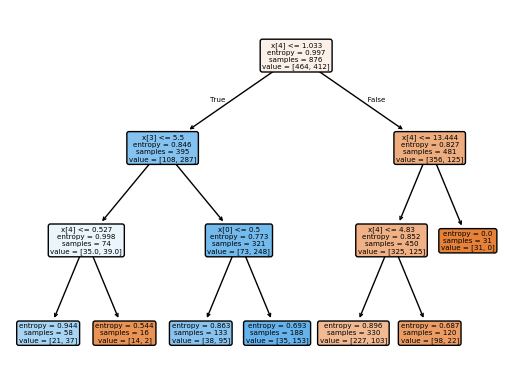

In [39]:
plot_tree(dt_model,rounded=True,filled=True)
plt.show()

### GridSearchCV

In [28]:
param_grid = {'criterion':['gini','entropy'],'max_depth':[3,4,5,6,7,8,9,10]}

In [40]:
grid_search_cv = GridSearchCV(estimator=dt_model,param_grid=param_grid,cv=5)

In [44]:
X_train.shape

(876, 5)

In [45]:
876/5

175.2

- 1 - 175
- 2 - 175
- 3 - 175
- 4 - 175
- 5 - 175

In [41]:
grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]})

In [42]:
grid_search_cv.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [43]:
grid_search_cv.best_score_

np.float64(0.7283181818181819)